In [1]:
# libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline
import warnings
warnings.filterwarnings("ignore")



In [2]:
# read data
df = pd.read_csv(r'C:\Users\Flora\3-1교과목 머신러닝\11주차\data07_diabetes.csv')
X = df.iloc[:,:-1]
y = df['Y']

In [3]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.75,random_state=0)



In [4]:
# linear regression
from sklearn.linear_model import LinearRegression
f = LinearRegression()
f.fit(xtrain,ytrain)
print("linear regression w,b: ", f.coef_, f.intercept_)
print("linear regression tr score: ", f.score(xtrain,ytrain))
print("linear regression test score: ", f.score(xtest,ytest))



linear regression w,b:  [  67.90807464 -260.92893154  645.62270415  278.9011711  -220.0498205
  187.29766363 -439.3980303  -100.33313334  575.06910517  -49.45534267] 154.56221569924784
linear regression tr score:  0.6281076518522537
linear regression test score:  0.43510681849311506


In [5]:
# ridge regression
from sklearn.linear_model import Ridge
f = Ridge(alpha=0.5)
f.fit(xtrain,ytrain)
print("Ridge w,b: ", f.coef_, f.intercept_)
print("Ridge tr score: ", f.score(xtrain,ytrain))
print("Ridge test score: ", f.score(xtest,ytest))



Ridge w,b:  [  51.45189735  -40.2022934   251.09604975  126.02280127   36.20229689
   20.39193404 -175.47820962  152.81367514  219.79636709   87.21041217] 153.43837670523615
Ridge tr score:  0.4949810684862713
Ridge test score:  0.3777066337055337


In [6]:
# lasso regression
from sklearn.linear_model import Lasso
f = Lasso(alpha=0.5)
f.fit(xtrain,ytrain)
print("Lasso w,b: ", f.coef_, f.intercept_)
print("Lasso tr score: ", f.score(xtrain,ytrain))
print("Lasso test score: ", f.score(xtest,ytest))



Lasso w,b:  [   0.           -0.          538.73484787   57.21043594    0.
    0.         -209.71102682    0.          488.81235455    0.        ] 153.4790910912592
Lasso tr score:  0.5767629347087475
Lasso test score:  0.43296864762792875


In [7]:
# lasso regression
from sklearn.linear_model import Lasso
f = Lasso(alpha=0.0001)
f.fit(xtrain,ytrain)
print("Lasso w,b: ", f.coef_, f.intercept_)
print("Lasso tr score: ", f.score(xtrain,ytrain))
print("Lasso test score: ", f.score(xtest,ytest))


Lasso w,b:  [  67.88122771 -260.81790969  645.75012167  278.68610934 -216.00177666
  183.88923854 -440.91764875 -100.29306801  573.20651436  -49.32174531] 154.56133057060424
Lasso tr score:  0.6281075278770467
Lasso test score:  0.43508433794572987


In [8]:
# lasso regression
from sklearn.linear_model import Lasso
f = Lasso(alpha=0.01)
f.fit(xtrain,ytrain)
print("Lasso w,b: ", f.coef_, f.intercept_)
print("Lasso tr score: ", f.score(xtrain,ytrain))
print("Lasso test score: ", f.score(xtest,ytest))


Lasso w,b:  [  63.36581043 -250.9965468   651.08350306  262.73491332   -6.20706171
    0.         -500.16467089  -73.63255636  470.66985264  -37.67267988] 154.51242141841817
Lasso tr score:  0.6275989789083299
Lasso test score:  0.4352063470232811


In [9]:
# lasso regression
from sklearn.linear_model import Lasso
f = Lasso(alpha=1)
f.fit(xtrain,ytrain)
print("Lasso w,b: ", f.coef_, f.intercept_)
print("Lasso tr score: ", f.score(xtrain,ytrain))
print("Lasso test score: ", f.score(xtest,ytest))


Lasso w,b:  [  0.          -0.         417.59776303   0.           0.
   0.         -65.72520784   1.48394071 445.23459218   0.        ] 153.63473105491457
Lasso tr score:  0.4961490948950036
Lasso test score:  0.3928440252694777


In [10]:
# Elastic Net regression
from sklearn.linear_model import ElasticNet
f = ElasticNet(alpha=0.1,l1_ratio=0.5)
f.fit(xtrain,ytrain)
print("ElasticNet w,b: ", f.coef_, f.intercept_)
print("ElasticNet tr score: ", f.score(xtrain,ytrain))
print("ElasticNet test score: ", f.score(xtest,ytest))



ElasticNet w,b:  [ 15.36503131   1.46807491  42.92827283  28.27941706  16.19523708
  13.25398799 -35.59133922  38.81720121  45.40079117  26.03170844] 153.8978069772954
ElasticNet tr score:  0.1482623097971808
ElasticNet test score:  0.11795535746913832


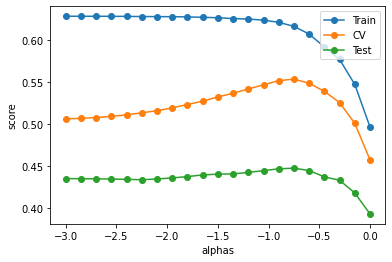

In [11]:
# select parameter using cross-validation
np.random.seed(0)
from sklearn.model_selection import cross_val_score
exp = np.linspace(-3,0,21)
alphas = 10**exp
s1 = np.zeros((len(alphas),3)) # empty space
for n in range(s1.shape[0]):
    f = Lasso(alpha=alphas[n])
    f.fit(xtrain,ytrain)
    s1[n,0] = f.score(xtrain,ytrain) #observed
    s1[n,1] = cross_val_score(f,xtrain,ytrain,cv=5).mean() #observed
    s1[n,2] = f.score(xtest,ytest) #not observed. final result

plt.plot(exp,s1[:,0],exp,s1[:,1],exp,s1[:,2],marker='o')
plt.legend(('Train','CV','Test'))
plt.xlabel('alphas')
plt.ylabel('score')
plt.show()



In [14]:
idx = np.argmax(s1[:,1]) # validation maximum index
f = Lasso(alpha=alphas[idx])
f.fit(xtrain,ytrain)
print("best Lasso alpha: ", f.alpha)
print("best Lasso w,b: ", f.coef_, f.intercept_)
print("best Lasso tr score: ", f.score(xtrain,ytrain))
print("best Lasso test score: ", f.score(xtest,ytest))



best Lasso alpha:  0.1778279410038923
best Lasso w,b:  [   0.         -120.15311164  607.21896882  177.93412178    0.
    0.         -345.3232781     0.          475.26518841    0.        ] 154.04970932074258
best Lasso tr score:  0.6160312323694284
best Lasso test score:  0.44730766534162747
